In [3]:
import numpy as np
data = np.array([155,126,27,82,115,140,73,92,110,134])

# 데이터 정렬
sorted_data = np.sort(data)

# 최솟값과 최댓값
minimum = np.min(sorted_data)
maximum = np.max(sorted_data)

# 중앙값
median = np.median(sorted_data)

# 중앙값보다 크거나 작은 데이터들 필터 & 1사분위수와 3사분위수
lower_half = sorted_data[sorted_data < median]
upper_half = sorted_data[sorted_data > median]
q1 = np.median(lower_half)
q3 = np.median(upper_half)

print("최솟값: ", minimum)
print("제1사분위수: ", q1)
print("중앙값: ", median)
print("제3사분위수: ", q3)
print("최댓값: ", maximum)

최솟값:  27
제1사분위수:  82.0
중앙값:  112.5
제3사분위수:  134.0
최댓값:  155


In [4]:
iqr = q3 - q1
print("IQR: ", iqr)

IQR:  52.0


In [5]:
# Q-Q plot

data = np.array([155,126,27,82,115,140,73,92,110,134])
sorted_data = np.sort(data)
n = len(data)

# 75th percentile (3rd quartile)
q3_percentile = (n-1) * 0.75 +1
j3, h3 = divmod(q3_percentile, 1)
q3 = (1-h3) * sorted_data[int(j3)-1] + h3*sorted_data[int(j3)]
print(q3)

132.0


In [6]:
import numpy as np
x = np.array([155,126,27,82,115,140,73,92,110,134])

q1 = np.percentile(x, 25)   # 1사분위수
q2 = np.percentile(x, 50)   # 중앙값(2사분위수)
q3 = np.percentile(x, 75)   # 3사분위수

print('1사분위수: ', q1)
print('2사분위수: ', q2)
print('3사분위수: ', q3)

1사분위수:  84.5
2사분위수:  112.5
3사분위수:  132.0


In [7]:
# 데이터에 대응하는 백분위 구하기

import numpy as np
import scipy.stats as sp
x = np.array([155,126,27,82,115,140,73,92,110,134])
percentiles = np.array([sp.percentileofscore(x, value, kind='rank') for value in x])
print(percentiles)

[100.  70.  10.  30.  60.  90.  20.  40.  50.  80.]


In [8]:
# QQ plot 그리기

import numpy as np
import scipy.stats as sp

data_x = np.array([4.62, 4.09, 6.2, 8.24, 0.77, 5.55, 3.11, 11.97, 2.16, 3.24, 10.91, 11.36, 0.87])
percentile_rank = np.array([sp.percentileofscore(data_x, value, kind='rank') for value in data_x])
print(percentile_rank[:6])

[53.84615385 46.15384615 69.23076923 76.92307692  7.69230769 61.53846154]


In [9]:
theory_x = sp.norm.ppf(percentile_rank/100, np.mean(data_x), np.std(data_x))
print(theory_x[:6])

[5.98342006 5.26119532 7.50120433 8.37600073 0.28902906 6.7195023 ]


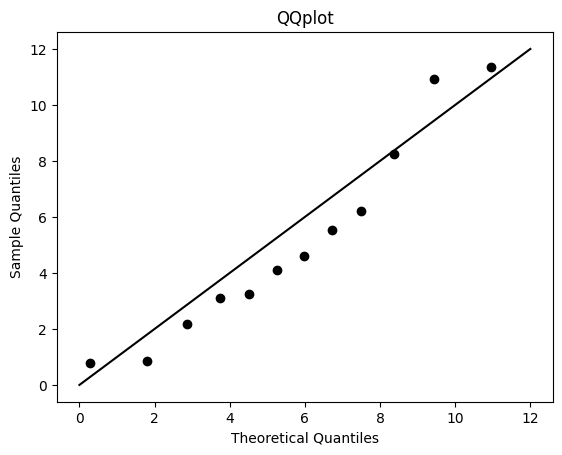

In [10]:
# QQ plot의 아이디어
import matplotlib.pyplot as plt

plt.scatter(theory_x, data_x, color = 'k')
plt.plot([0,12], [0,12], 'k')
plt.title('QQplot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

((array([-1.62649229, -1.1460438 , -0.83908498, -0.59616318, -0.38436112,
         -0.18866497,  0.        ,  0.18866497,  0.38436112,  0.59616318,
          0.83908498,  1.1460438 ,  1.62649229]),
  array([ 0.77,  0.87,  2.16,  3.11,  3.24,  4.09,  4.62,  5.55,  6.2 ,
          8.24, 10.91, 11.36, 11.97])),
 (np.float64(4.04216109144469),
  np.float64(5.622307692307692),
  np.float64(0.9668922332651619)))

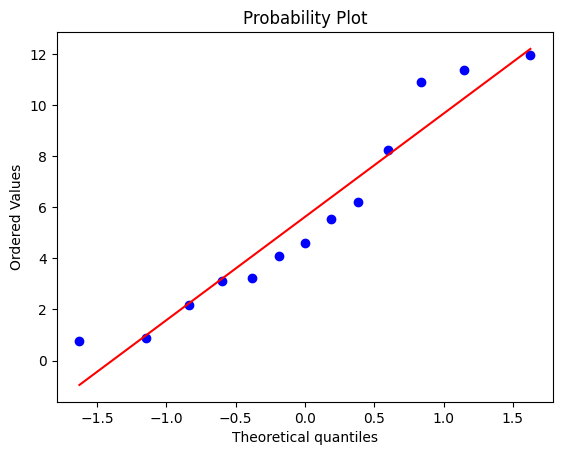

In [11]:
sp.probplot(data_x, dist='norm', plot=plt)

In [12]:
#shapiro-wilk 검정
import scipy.stats as sp
data_x = np.array([4.62, 4.09, 6.2, 8.24, 0.77, 5.55, 3.11, 11.97, 2.16, 3.24, 10.91, 11.36, 0.87])
w, p_value = sp.shapiro(data_x)
print("W: ", w)
print("p-value: ", p_value)

W:  0.912324024737738
p-value:  0.1973044131714471


In [13]:
#anderson-darling 검정
from scipy.stats import anderson, norm
sample_data = np.array([4.62, 4.09, 6.2, 8.24, 0.77, 5.55, 3.11, 11.97, 2.16, 3.24, 10.91, 11.36, 0.87])

# Anderson-darling 검정 수행
result = sp.anderson(sample_data, dist='norm')

print('검정통계량: ', result[0])
print('임곗값: ', result[1])
print('유의수준: ', result[2])

검정통계량:  0.42498266409126906
임곗값:  [0.497 0.566 0.679 0.792 0.942]
유의수준:  [15.  10.   5.   2.5  1. ]


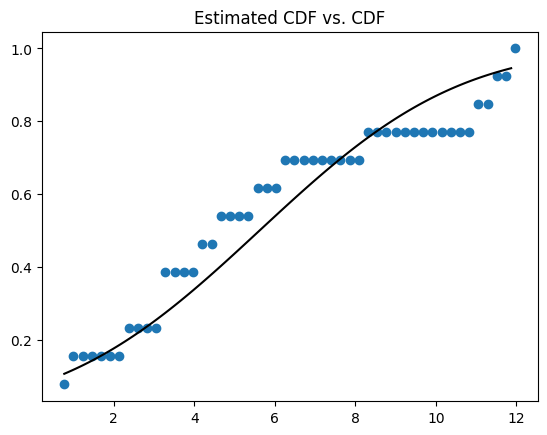

In [18]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample_data)
x = np.linspace(min(sample_data), max(sample_data))
y = ecdf(x)

plt.scatter(x,y)
plt.title("Estimated CDF vs. CDF")

# add Normal CDF
k = np.arange(min(sample_data), max(sample_data), 0.1)
plt.plot(k, norm.cdf(k, loc = np.mean(sample_data), scale = np.std(sample_data, ddof=1)), color='k')
plt.show;

In [19]:
# 카이제곱 검정
import numpy as np
sample_data = [10.67, 9.92, 9.62, 9.53, 9.14, 9.74, 8.45, 12.65, 11.47, 8.62]
n = len(sample_data)
sample_variance = np.var(sample_data, ddof=1)
t = (n-1)*sample_variance / 1.3
print(t)

11.626530769230774


In [20]:
from scipy.stats import chi2
print('p-value: ', 1-chi2.cdf(t, df=n-1))

p-value:  0.23519165145589116


In [21]:
# 운동선수, 일반인 : 흡연, 비흡연 카테고리 독립성 검정
# X^2 검정통계량 : 15.55

from scipy.stats import chi2

# 기각역 계산
critical_value = chi2.ppf(0.95, df=1)
print(critical_value)

# 따라서 귀무가설을 기각할 수 있다. (X^2 검정통계량이 임계값보다 크기 때문이다.)

3.841458820694124


In [22]:
# 유의확률을 구하여 판단

pvalue = chi2.sf(15.55, df=1)
print(pvalue)

# 따라서 귀무가설을 기각할 수 있다. (p-value가 유의수준 0.05보다 작기 때문이다.)
# 따라서, 운동선수와 흡연 여부 간에는 독립적이지 않다고 결론내릴 수 있다.

8.035164786841964e-05


In [26]:
import numpy as np
from scipy.stats import chi2_contingency

table = np.array([[14,4], [0,10]])

chi2, p, df, expected = chi2_contingency(table, correction=False)
print('X-Squared: ', chi2.round(3), 'df: ', df, 'p-value: ', p.round(3))

X-Squared:  15.556 df:  1 p-value:  0.0


In [27]:
print(expected)

[[9. 9.]
 [5. 5.]]


In [28]:
# 동질성 검정

import numpy as np
from scipy.stats import chi2_contingency

# 데이터 설정 : 교차표
table = np.array([[50,30,20],   # 도시 X
                  [45,35,20]])  # 도시 Y

chi2, p, df, expected = chi2_contingency(table, correction=False)
print(chi2.round(3), p.round(3))

0.648 0.723


In [29]:
from scipy.stats import chisquare
import numpy as np

observed = np.array([13,23,24,20,27,18,15])
expected = np.repeat(20,7)

statistic, p_value = chisquare(observed, f_exp=expected)
print("Test statistic: ", statistic.round(3))
print("p-value: ", p_value.round(3))

Test statistic:  7.6
p-value:  0.269


In [30]:
print(expected)

[20 20 20 20 20 20 20]
